In [51]:
# Packages used

import numpy as np 
from lmfit import Model
import inspect
import matplotlib.pyplot as plt 


In [3]:
# Data

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 1, 5, 3, 2, 4, 6, 9, 5, 8]



/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


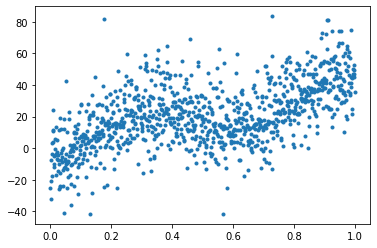

In [52]:
# Data generator

import random

x = np.linspace(0, 1, 1000)

a0 = 4.02
a1 = 31.42
a2 = 11
a3 = 10
a4 = 11


y = [a0 + a1*i + a2 * np.sin(a3*i+a4) for i in x]
y = [i+ np.random.normal(0,10)**1.2 for i in y]

plt.plot(x,y, '.',)

In [3]:
# Example functions

def linear_fun(x, a, b):
    return a + b * x
lmodel = Model(linear_fun)

def x3_fun(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3
x3model = Model(x3_fun)

/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


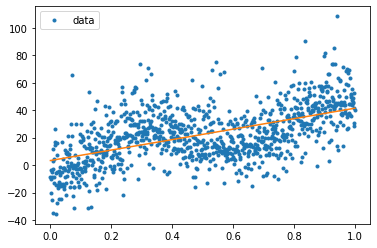

[[Model]]
    Model(linear_fun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 1000
    # variables        = 2
    chi-square         = 291283.604
    reduced chi-square = 291.867339
    Akaike info crit   = 5678.29738
    Bayesian info crit = 5688.11289
[[Variables]]
    a:  3.30012992 +/- 1.07968509 (32.72%) (init = 0)
    b:  38.1106190 +/- 1.86960163 (4.91%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.866


In [4]:
result = lmodel.fit(y, x=x, a=0, b=3)


a = result.params['a'].value
b = result.params['b'].value

x_fit = np.linspace(min(x), max(x), num=100)
y_fit = lmodel.eval(x=x_fit, a=a, b=b)

plt.plot(x, y, '.', label='data')
plt.plot(x_fit, y_fit)
plt.legend()
plt.show()

print(result.fit_report())

/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


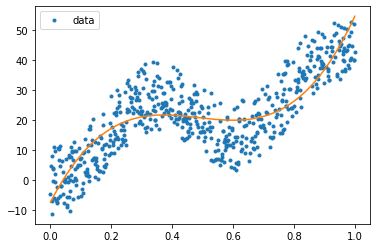

In [48]:
result = x3model.fit(y, x=x, a0=0, a1=1, a2=1, a3=1)

#print(result.fit_report())

params = x3model.make_params()
for p in params:
    params[p].value = result.params[p].value
x_fit = np.linspace(min(x), max(x), num=100)
y_fit = x3model.eval(params, x=x_fit)

plt.plot(x, y, '.', label='data')
plt.plot(x_fit, y_fit)
plt.legend()
plt.show()


In [49]:
#1 Function used and initial values for the fit

i_val = [0, 1, 1, 1, 5, 1, 1]    # Initial parameters in order

def generic_fun(x, a0, a1, a2, a3, a4, a5, a6):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 + a5 * x**5 + a6 * x**6


In [31]:
#2 Function used and initial values for the fit

i_val = [10, 10, 10, 10, 5, 10]    # Initial parameters in order

def generic_fun(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * np.sin( a3 * x + a4)


<ipython-input-50-1546e4369feb>:7: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(generic_fun).args
/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


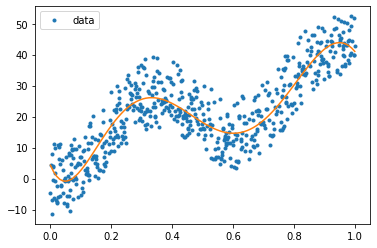

[[Model]]
    Model(generic_fun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1192
    # variables        = 7
    chi-square         = 25493.4043
    reduced chi-square = 21.5134213
    Akaike info crit   = 3664.84234
    Bayesian info crit = 3700.42605
[[Variables]]
    a0:  4.32241728 +/- 1.23027621 (28.46%) (init = 0)
    a1: -234.505559 +/- 34.9246453 (14.89%) (init = 1)
    a2:  3148.10126 +/- 308.725772 (9.81%) (init = 1)
    a3: -11242.9295 +/- 1172.88748 (10.43%) (init = 1)
    a4:  16941.7955 +/- 2153.60527 (12.71%) (init = 5)
    a5: -11232.1799 +/- 1884.75481 (16.78%) (init = 1)
    a6:  2656.31274 +/- 630.136166 (23.72%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a5, a6) = -0.996
    C(a4, a5) = -0.995
    C(a3, a4) = -0.992
    C(a2, a3) = -0.985
    C(a4, a6) =  0.983
    C(a3, a5) =  0.974
    C(a1, a2) = -0.967
    C(a2, a4) =  0.957
    C(a3, a6) = -0.953
    C(a2, a5) = -0.925
   

In [50]:

# This part of the code should be the same for everything

# Creates model
gmodel = Model(generic_fun)
# Get initial coefficients for the fit
i_params = gmodel.make_params()
args = inspect.getargspec(generic_fun).args
args.remove('x')

iv_dict = {}
for i in range(0,len(args)):
    iv_dict[args[i]] = i_val[i]

for p in i_params:
    i_params[p].value = iv_dict[p]




# Model fit
result = gmodel.fit(y, i_params, x=x)
params = gmodel.make_params()


#params = gmodel.make_params()
for p in params:
    params[p].value = result.params[p].value


x_fit = np.linspace(min(x), max(x), num=100)
y_fit = gmodel.eval(params, x=x_fit)





plt.plot(x, y, '.', label='data')
plt.plot(x_fit, y_fit)
plt.legend()
plt.show()

print(result.fit_report())

In [271]:
# Example of sigma clipping
nsig = 2

delt = y - gmodel.eval(params, x=x)
threshold = nsig * np.std(delt) 

valid = abs(delt) < threshold

# Used x and y
x = np.array(x)[valid]
y = np.array(y)[valid]

len(valid)

704

<ipython-input-53-16c7faaa3099>:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(generic_fun).args
/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


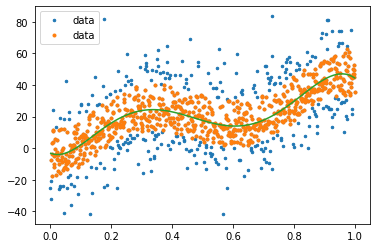

[[Model]]
    Model(generic_fun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 1408
    # variables        = 7
    chi-square         = 48778.0984
    reduced chi-square = 34.8166299
    Akaike info crit   = 5005.51650
    Bayesian info crit = 5042.26598
[[Variables]]
    a0: -3.20626489 +/- 1.51516333 (47.26%) (init = 0)
    a1: -77.7877869 +/- 42.2102880 (54.26%) (init = 1)
    a2:  1910.26866 +/- 370.679434 (19.40%) (init = 1)
    a3: -6940.19669 +/- 1399.04416 (20.16%) (init = 1)
    a4:  9628.81162 +/- 2550.93591 (26.49%) (init = 5)
    a5: -5270.47505 +/- 2216.77517 (42.06%) (init = 1)
    a6:  796.951583 +/- 736.015761 (92.35%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a5, a6) = -0.997
    C(a4, a5) = -0.995
    C(a3, a4) = -0.992
    C(a2, a3) = -0.986
    C(a4, a6) =  0.984
    C(a3, a5) =  0.975
    C(a1, a2) = -0.968
    C(a2, a4) =  0.959
    C(a3, a6) = -0.955
    C(a2, a5) = -0.928
  

In [53]:
# With loop


# This part of the code should be the same for everything

# Creates model
gmodel = Model(generic_fun)
# Get initial coefficients for the fit
i_params = gmodel.make_params()
args = inspect.getargspec(generic_fun).args
args.remove('x')

iv_dict = {}
for i in range(0,len(args)):
    iv_dict[args[i]] = i_val[i]

for p in i_params:
    i_params[p].value = iv_dict[p]



plt.plot(x, y, '.', label='data', markersize=5)

# Model fit
nsig = 2

len_valid = 0    # 0 to force the first iteration
len_y = len(y)
while len_valid < len_y:
    result = gmodel.fit(y, i_params, x=x)
    params = gmodel.make_params()
    for p in params:
        params[p].value = result.params[p].value

    delt = y - gmodel.eval(params, x=x)
    threshold = nsig * np.std(delt) 

    valid = abs(delt) < threshold
    
    len_y = len(y)
    len_valid = len(valid[valid==True])

    # New x and y used
    x = np.array(x)[valid]
    y = np.array(y)[valid]




x_fit = np.linspace(min(x), max(x), num=100)
y_fit = gmodel.eval(params, x=x_fit)





plt.plot(x, y, '.', label='data')
plt.plot(x_fit, y_fit)
plt.legend()
plt.show()

print(result.fit_report())